In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
data_user=pd.read_csv(r'D:\Python教程\数据分析师训练营\数据分析项目\taobao_recommend_train_user\UserBehavior.csv',\
                     names=['user_id','item_id','category','behavior','time'],\
                      sep=',',nrows=3000000)

In [21]:
data_user.head()

,user_id,item_id,category,behavior,time
0,1,2268318,2520377,pv,1511544070
1,1,2333346,2520771,pv,1511561733
2,1,2576651,149192,pv,1511572885
3,1,3830808,4181361,pv,1511593493
4,1,4365585,2520377,pv,1511596146


In [22]:
data_user.describe()

,user_id,item_id,category,time
count,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06
mean,2.485496e+05,2.577731e+06,2.712066e+06,1.511962e+09
std,2.855340e+05,1.487678e+06,1.466055e+06,9.060056e+05
min,1.000000e+00,2.600000e+01,2.171000e+03,4.401600e+04
25%,1.239620e+05,1.293940e+06,1.349561e+06,1.511763e+09
50%,1.620650e+05,2.575122e+06,2.723483e+06,1.511966e+09
75%,1.989660e+05,3.859573e+06,4.145813e+06,1.512181e+09
max,1.018011e+06,5.163067e+06,5.161669e+06,1.535452e+09


In [23]:
# 时间戳转换,只保留到小时即可
#方法一，用time.strftime()，但此方法转换后的类型为str格式
import time
data_user['date']=data_user['time'].apply(lambda x: time.strftime('%Y-%m-%d',time.localtime(x)))
data_user['hour']=data_user['time'].apply(lambda x: time.strftime('%H',time.localtime(x)))

In [24]:
data_user.head()

,user_id,item_id,category,behavior,time,date,hour
0,1,2268318,2520377,pv,1511544070,2017-11-25,01
1,1,2333346,2520771,pv,1511561733,2017-11-25,06
2,1,2576651,149192,pv,1511572885,2017-11-25,09
3,1,3830808,4181361,pv,1511593493,2017-11-25,15
4,1,4365585,2520377,pv,1511596146,2017-11-25,15


In [25]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 7 columns):
user_id     int64
item_id     int64
category    int64
behavior    object
time        int64
date        object
hour        object
dtypes: int64(4), object(3)
memory usage: 160.2+ MB


In [8]:
# 时间戳转换,只保留到小时即可
#方法二,利用pd.to_datetime()转换，但要在此时区上加8小时，格式为datetime64
data_user['date_']=pd.to_datetime(data_user.time.values,unit='s',utc=True).tz_convert('Asia/Shanghai')
data_user['date']=data_user['date_'].astype('str').str[:10]
data_user['hour']=data_user['date_'].astype('str').str[11:13]

In [9]:
del data_user['date_']
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 7 columns):
user_id     int64
item_id     int64
category    int64
behavior    object
time        int64
date        object
hour        object
dtypes: int64(4), object(3)
memory usage: 160.2+ MB


In [10]:
data_user['hour']=data_user['hour'].astype('int64')
data_user['date']=pd.to_datetime(data_user['date'])

In [26]:
data_user.head()

,user_id,item_id,category,behavior,time,date,hour
0,1,2268318,2520377,pv,1511544070,2017-11-25,01
1,1,2333346,2520771,pv,1511561733,2017-11-25,06
2,1,2576651,149192,pv,1511572885,2017-11-25,09
3,1,3830808,4181361,pv,1511593493,2017-11-25,15
4,1,4365585,2520377,pv,1511596146,2017-11-25,15


In [27]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 7 columns):
user_id     int64
item_id     int64
category    int64
behavior    object
time        int64
date        object
hour        object
dtypes: int64(4), object(3)
memory usage: 160.2+ MB


In [28]:
data_user.date.unique()

array(['2017-11-25', '2017-11-26', '2017-11-27', '2017-11-28',
       '2017-11-29', '2017-11-30', '2017-12-01', '2017-12-02',
       '2017-12-03', '2017-09-11', '2017-11-24', '2017-11-20',
       '2017-11-23', '2017-11-17', '2017-11-19', '2017-11-22',
       '2017-11-14', '2017-11-21', '2017-11-16', '2017-11-18',
       '2017-11-10', '2017-12-04', '2017-11-06', '2017-11-12',
       '2017-11-13', '2018-08-28', '2017-11-11', '2017-09-16',
       '2017-07-03', '2015-02-06', '2017-11-05', '2017-11-15',
       '1970-01-01', '2017-12-06', '2017-11-03'], dtype=object)

In [29]:
data_user=data_user[(data_user['date']>='2017-11-25')&(data_user['date']<='2017-12-03')]

In [30]:
data_user.date.unique()

array(['2017-11-25', '2017-11-26', '2017-11-27', '2017-11-28',
       '2017-11-29', '2017-11-30', '2017-12-01', '2017-12-02',
       '2017-12-03'], dtype=object)

In [31]:
data_user.describe()

,user_id,item_id,category,time
count,2.998533e+06,2.998533e+06,2.998533e+06,2.998533e+06
mean,2.485566e+05,2.577736e+06,2.712079e+06,1.511963e+09
std,2.855421e+05,1.487670e+06,1.466066e+06,2.303208e+05
min,1.000000e+00,2.600000e+01,2.171000e+03,1.511539e+09
25%,1.239620e+05,1.293995e+06,1.349561e+06,1.511763e+09
50%,1.620650e+05,2.575122e+06,2.723483e+06,1.511966e+09
75%,1.989660e+05,3.859581e+06,4.145813e+06,1.512181e+09
max,1.018011e+06,5.163067e+06,5.161669e+06,1.512317e+09


In [32]:
data_user.duplicated().value_counts()

False    2998532
True           1
dtype: int64

In [33]:
data_user.drop_duplicates(inplace=True)

In [34]:
data_user.duplicated().value_counts()

False    2998532
dtype: int64

（1）pv和uv分析

PV(访问量)：即Page View, 具体是指网站的是页面浏览量或者点击量，页面被刷新一次就计算一次。

UV(独立访客)：即Unique Visitor,访问您网站的一台电脑客户端为一个访客。

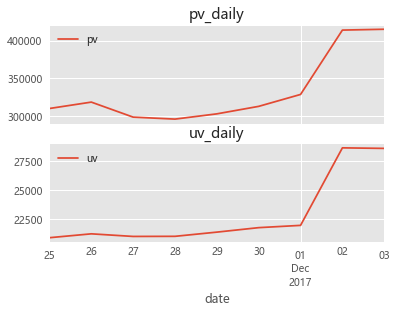

In [341]:
#pv_daily记录每天用户操作次数，uv_daily记录每天不同的上线用户数量
pv_daily=data_user.groupby('date')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_daily=data_user.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig,ax=plt.subplots(2,1,sharex=True)
pv_daily.plot(x='date',y='pv',ax=ax[0])
uv_daily.plot(x='date',y='uv',ax=ax[1])
ax[0].set_title('pv_daily')
ax[1].set_title('uv_daily')
plt.savefig(r'C:\Users\Lenovo\Desktop\image1.png',dpi=400,bbox_inches='tight')

Text(0.5, 1.0, 'uv_hour')

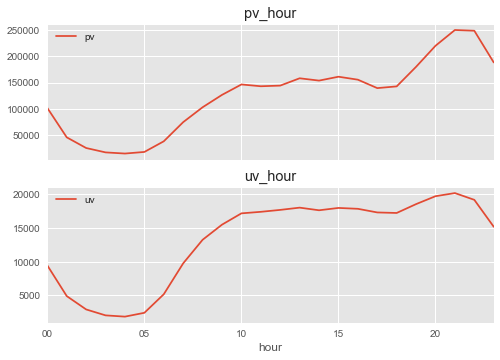

In [327]:
#pv_hour记录每小时用户操作次数，uv_hour记录每小时不同的上线用户数量
pv_hour=data_user.groupby('hour')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_hour=data_user.groupby('hour')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig,axes=plt.subplots(2,1,sharex=True)
pv_hour.plot(x='hour',y='pv',ax=axes[0])
uv_hour.plot(x='hour',y='uv',ax=axes[1])
axes[0].set_title('pv_hour')
axes[1].set_title('uv_hour')


Text(0.5, 1.0, 'pv_different_behavior_type_except1')

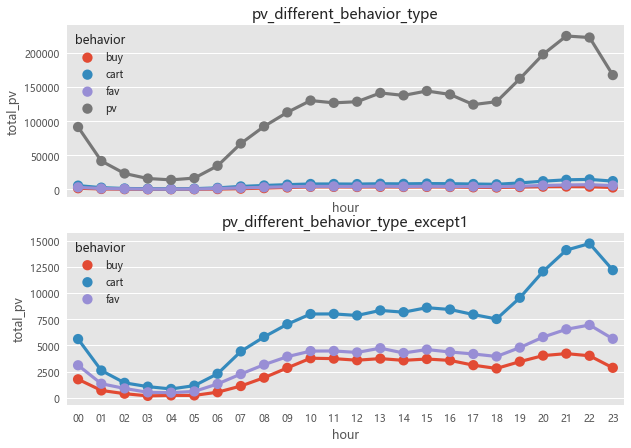

In [353]:
pv_detail=data_user.groupby(['behavior','hour'])['user_id'].count().reset_index().rename(columns={'user_id':'total_pv'})
fig,axes=plt.subplots(2,1,figsize=(10,7),sharex=True)
sns.pointplot(x='hour',y='total_pv',hue='behavior',data=pv_detail,ax=axes[0])
sns.pointplot(x='hour',y='total_pv',hue='behavior',data=pv_detail[pv_detail.behavior!='pv'],ax=axes[1])
axes[0].set_title('pv_different_behavior_type')
axes[1].set_title('pv_different_behavior_type_except1')

有图表显示：点击这一用户行为相比较于其他三类用户行为，pv访问量较高，同时四种用户行为的波动情况基本一致，因此晚上这一时间段不管哪一种用户行为，pv访问量都是最高的。从图2可以看出，加入购物车这一用户行为的pv总量高于收藏的总量，因此在后续漏斗流失分析中，用户类型3应该在2之前分析。

(-1, 50)

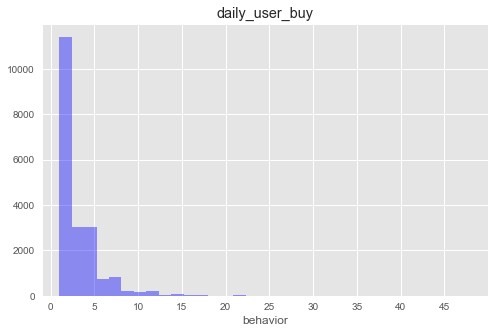

In [278]:
data_user_buy=data_user[data_user.behavior=='buy'].groupby('user_id')['behavior'].count()
plt.figure(figsize=(8,5))
sns.distplot(data_user_buy,kde=False,color='b')
plt.title('daily_user_buy')
plt.xticks(range(0,50,5))
plt.xlim(-1,50)

图表显示：淘宝用户消费次数普遍在10次以内，因此需要重点关注购买次数在10次以上的消费者用户群体。

ARPPU（average revenue per paying user）是指从每位付费用户身上获得的收入，它反映的是每个付费用户的平均付费额度。

ARPPU=总收入/活跃用户付费数量

因为本数据集中没有消费金额，因此在计算过程中用消费次数代替消费金额

人均消费次数=消费总次数/消费人数

Text(0.5, 1.0, 'daily_ARPPU')

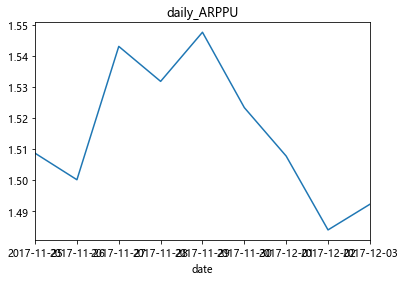

In [46]:
data_use_buy1=data_user[data_user.behavior=='buy'].groupby(['date','user_id'])['behavior'].count().reset_index().rename(columns={'behavior':'total'})
data_use_buy1.groupby('date').apply(lambda x:x.total.sum()/x.total.count()).plot()
plt.title('daily_ARPPU')

ARPU(Average Revenue Per User) ：平均每用户收入，可通过 总收入/AU 计算得出。它可以衡量产品的盈利能力和发展活力。

活跃用户数平均消费次数=消费总次数/活跃用户人数(每天有操作行为的为活跃)

Text(0.5, 1.0, 'daily_ARPU')

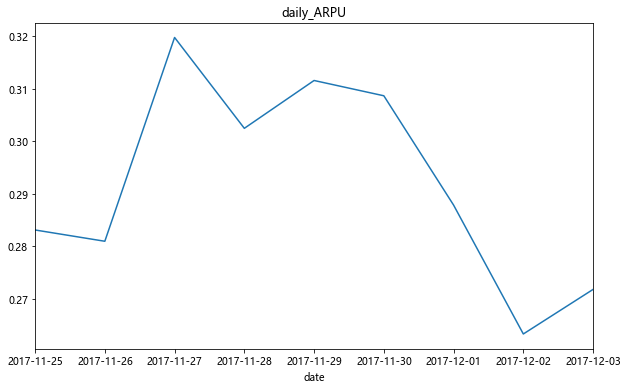

In [48]:
data_user['operation']=1
data_use_buy2=data_user.groupby(['date','user_id','behavior'])['operation'].count().reset_index().rename(columns={'operation':'total'})
data_use_buy2.groupby('date').apply(lambda x:x[x.behavior=='buy'].total.sum()/len(x.user_id.unique())).plot(figsize=(10,6))
plt.title('daily_ARPU')

付费率=消费人数/活跃用户人数

Text(0.5, 1.0, 'daily_afford_rate')

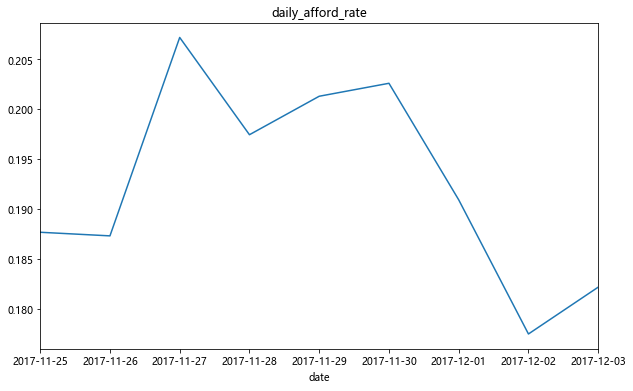

In [50]:
data_use_buy2.groupby('date').apply(lambda x:x[x.behavior=='buy'].total.count()/len(x.user_id.unique())).plot(figsize=(10,6))
plt.title('daily_afford_rate')

In [282]:
len(data_user[data_user.behavior=='buy'].user_id.unique())/len(data_user.user_id.unique())

0.6820892453218178

大多数用户消费：1次


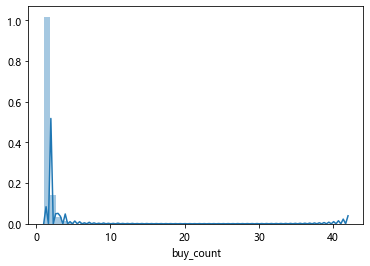

In [57]:
#同一时间段用户消费次数分布
data_user_buy3=data_user[data_user.behavior=='buy'].groupby(['user_id','date','hour'])['operation'].sum().rename('buy_count')
sns.distplot(data_user_buy3)
print('大多数用户消费：{}次'.format(data_user_buy3.mode()[0]))

复购情况，即两天以上有购买行为,一天多次购买算一次
复购率=有复购行为的用户数/有购买行为的用户总数

In [59]:
date_rebuy=data_user[data_user.behavior=='buy'].groupby('user_id')['date'].apply(lambda x:len(x.unique())).rename('rebuy_count')
print('复购率:',round(date_rebuy[date_rebuy>=2].count()/date_rebuy.count(),4))

复购率: 0.5496


多数用户复购次数：0次


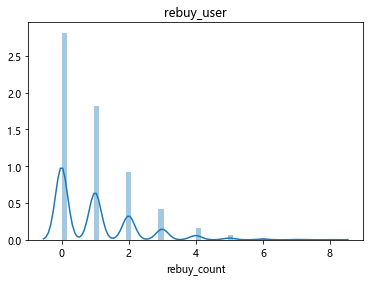

In [60]:
sns.distplot(date_rebuy-1)
plt.title('rebuy_user')
print('多数用户复购次数：{}次'.format((date_rebuy-1).mode()[0]))

R-最近一次消费 (Recency)

F-消费频率 (Frequency)

M-消费金额 (Monetary)（数据中无消费金额，故此项不参与分析）

In [76]:
from datetime import datetime
#每位用户最近购买时间间隔
data_user['date']=pd.to_datetime(data_user['date'],format='%Y-%m-%d')
recent_buy_time=data_user[data_user.behavior=='buy'].groupby('user_id').date.apply(lambda x:data_user.date.max()-x.sort_values().iloc[-1]).reset_index().rename(columns={'date':'recent'})
recent_buy_time.recent=recent_buy_time.recent.map(lambda x:x.days)

In [85]:
#每个用户消费频率
buy_freq=data_user[data_user.behavior=='buy'].groupby('user_id').date.count().reset_index().rename(columns={'date':'freq'})
rfm=pd.merge(recent_buy_time,buy_freq,left_on='user_id',right_on='user_id',how='outer')

In [86]:
rfm.head()

,user_id,recent,freq
0,100,5,8
1,117,5,10
2,119,4,3
3,121,8,1
4,122,1,3


In [147]:
#将各维度分成两个程度,分数越高越好
rfm['R']=rfm.recent.apply(lambda x: '1' if x<=rfm.recent.mean() else '0')
rfm['F']=rfm.freq.apply(lambda x: '1' if x>=rfm.freq.mean() else '0')
rfm['rfm']=rfm['R'].str.cat(rfm['F'])
rfm.head()

,user_id,recent,freq,R,F,rfm
0,100,5,8,0,1,01
1,117,5,10,0,1,01
2,119,4,3,0,0,00
3,121,8,1,0,0,00
4,122,1,3,1,0,10


In [148]:
rfm.rfm.replace({'11':'价值客户','10':'发展客户','01':'保持用户','00':'挽留客户'},inplace=True)
rfm.head()

,user_id,recent,freq,R,F,rfm
0,100,5,8,0,1,保持用户
1,117,5,10,0,1,保持用户
2,119,4,3,0,0,挽留客户
3,121,8,1,0,0,挽留客户
4,122,1,3,1,0,发展客户


Text(0.5, 1.0, '用户价值分类统计')

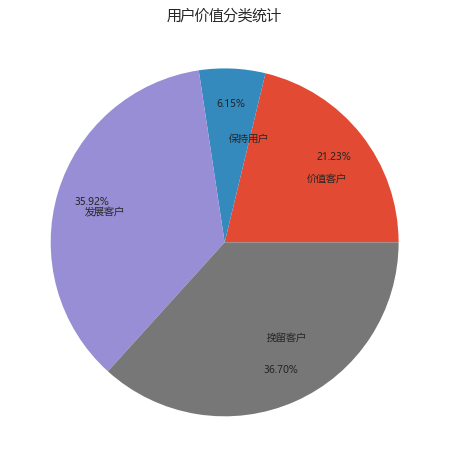

In [358]:
rfm_rfm=rfm.groupby('rfm')['user_id'].count().reset_index().rename(columns={'user_id':'counts'})
plt.figure(figsize=(8,8))
plt.pie(data=rfm_rfm,x=rfm_rfm.counts,labels=rfm_rfm.rfm,autopct='%.2f%%',pctdistance=0.8,labeldistance=0.6)
plt.title('用户价值分类统计')

不同商品种类的用户行为分析

C:\Users\Lenovo\anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


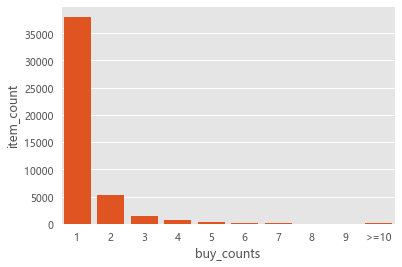

In [363]:
#购买次数分析
data_item=data_user[data_user.behavior=='buy'].groupby('item_id').behavior.count().reset_index().rename(columns={'behavior':'buy_counts'})
data_item=data_item.groupby('buy_counts').count().reset_index().rename(columns={'item_id':'item_count'})
data_item=data_item.sort_values('item_count',ascending=False)
data_item_oper=data_item.iloc[:9,:]
data_item_oper.loc[9]=['>=10',data_item.item_count.sum()-data_item_oper.item_count.sum()]
plt.style.use('ggplot')
sns.barplot(x=data_item_oper.buy_counts,y=data_item_oper.item_count,color='orangered')

本次分析的商品种类有804825种，只购买一次的产品占82.65%，购买两次的产品占11.52%，没有出现购买用户数量非常集中的商品

说明商品售卖主要依靠长尾商品的累积效应，而非爆款商品的带动。

从另一角度看，说明淘宝上商品数量足够多，以致使用户可以有更多的选择，而不用局限于单一爆款

In [289]:
#列出销量前20的商品
a=data_user[data_user.behavior=='buy'].groupby('item_id').user_id.count().reset_index().rename(columns={'user_id':'buy_count'})
a.sort_values('buy_count',ascending=False).iloc[:20,:]

,item_id,buy_count
27812,3122135,45
27000,3031354,22
26395,2964774,20
2326,257772,20
9158,1034594,19
16903,1910706,19
35412,3964583,19
28418,3189426,18
6352,705557,17
28858,3237415,17


In [291]:
b=data_user[data_user.behavior=='pv'].groupby('item_id').user_id.count().reset_index().rename(columns={'user_id':'pv_count'})
b.sort_values('pv_count',ascending=False).iloc[:30,:]

,item_id,pv_count
121411,812879,899
576248,3845720,770
304400,2032668,629
349396,2331370,621
21020,138964,586
454487,3031354,570
9126,59883,537
350380,2338453,532
229699,1535294,527
631012,4211339,527


In [295]:
c=pd.merge(a,b,how='inner',left_on='item_id',right_on='item_id')
c.sort_values('buy_count',ascending=False)

,item_id,buy_count,pv_count
25000,3122135,45,58
24279,3031354,22,570
2096,257772,20,99
23739,2964774,20,214
15207,1910706,19,39
...,...,...,...
15198,1909355,1,57
15199,1909589,1,2
15200,1909690,1,14
15201,1909773,1,1


In [318]:
c.pv_count.max()

899

In [316]:
d=pd.merge(a,b,how='inner',left_on='item_id',right_on='item_id')
d.sort_values('pv_count',ascending=False).iloc[:1383,:]

,item_id,buy_count,pv_count
6585,812879,4,899
30835,3845720,3,770
16183,2032668,4,629
18613,2331370,4,621
1137,138964,3,586
...,...,...,...
37157,4634635,4,59
40209,5014352,4,59
40447,5042305,1,59
3244,396715,2,59


In [197]:
#转化率分析
data_pv=data_user[data_user['behavior']=='pv'].groupby('item_id').behavior.count().reset_index().rename(columns={'behavior':'pv'})
data_pv=data_pv.sort_values('pv',ascending=False).reset_index().drop('index',axis=1)
data_pv.head()

,item_id,pv
0,812879,899
1,3845720,770
2,2032668,629
3,2331370,621
4,138964,586


In [407]:
data_buy=data_user[data_user['behavior']=='buy'].groupby('item_id').behavior.count().reset_index().rename(columns={'behavior':'buy'})
data_buy=data_buy.sort_values('buy',ascending=False).reset_index().drop('index',axis=1)
data_buy.head()

,item_id,buy
0,3122135,45
1,3031354,22
2,2964774,20
3,257772,20
4,1034594,19


In [432]:
data_pv_buy=pd.merge(data_pv,data_buy,left_on='item_id',right_on='item_id',how='inner')
data_pv_buy.head()

,item_id,pv,buy
0,812879,899,4
1,3845720,770,3
2,2032668,629,4
3,2331370,621,4
4,138964,586,3


In [433]:
data_pv_buy['转化率%']=round(data_pv_buy.buy/data_pv_buy.pv,4)
data_pv_buy['转化率%']=data_pv_buy['转化率%'].apply(lambda x: format(x,'.2%'))
data_pv_buy['转化率%']=data_pv_buy['转化率%'].str.strip('%').astype(float)
data_pv_buy=data_pv_buy.sort_values('pv',ascending=False)
data_pv_buy=data_pv_buy.iloc[:100,:]
data_pv_buy.head()

,item_id,pv,buy,转化率%
0,812879,899,4,0.44
1,3845720,770,3,0.39
2,2032668,629,4,0.64
3,2331370,621,4,0.64
4,138964,586,3,0.51


In [434]:
data_pv_buy=data_pv_buy.sort_values('转化率%').iloc[:30,:]
data_pv_buy

,item_id,pv,buy,转化率%
6,59883,537,1,0.19
9,4211339,527,1,0.19
18,640975,402,1,0.25
29,3011437,325,1,0.31
32,3529591,319,1,0.31
31,1951985,321,1,0.31
33,2783905,311,1,0.32
35,2828948,302,1,0.33
47,4622270,281,1,0.36
49,1541734,273,1,0.37


Text(0.5, 1.0, '点击率TOP100中转化率最低的30个item')

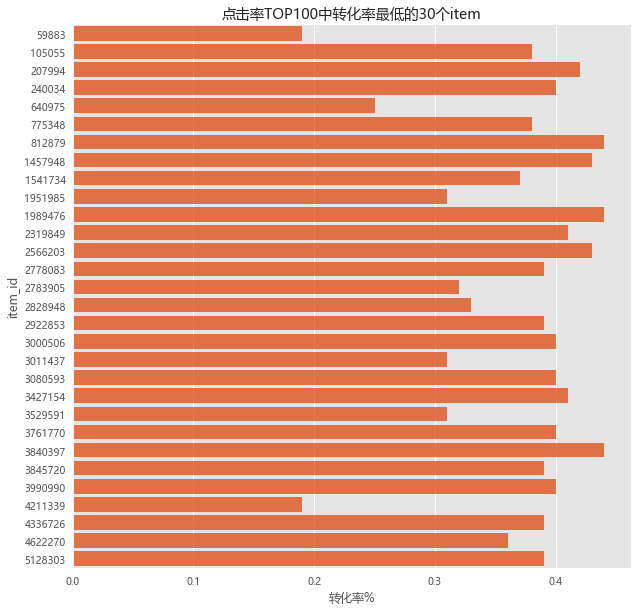

In [436]:
plt.figure(figsize=(10,10))
sns.barplot(y=data_pv_buy['item_id'],x=data_pv_buy['转化率%'],data=data_pv_buy,orient='h',alpha=0.8,color='orangered')
plt.title('点击率TOP100中转化率最低的30个item')

In [245]:
#APP访问总量/访问用户总数
pv=data_user[data_user.behavior=='pv'].user_id.count()
pv

2684410

In [244]:
uv=len(data_user.user_id.unique())
uv

29178

In [246]:
pv/uv

92.00116526149839

In [256]:
#跳失率=只点击一次浏览的用户数量/总用户访问量
(data_user.groupby('user_id').behavior.count()==1).sum()

1

在统计时间内，只有1人只浏览过一个页面就离开了APP，可以忽略不计，说明淘宝拥有足够的吸引力让用户停留在APP中

In [261]:
#用户各类行为总数
data_user.groupby('behavior').user_id.count().reset_index().rename(columns={'user_id':'count'}).sort_values('count',ascending=False)

,behavior,count
3,pv,2684410
1,cart,167572
2,fav,86576
0,buy,59974


In [268]:
#独立行为用户漏斗模型计算:
data_user.groupby('behavior').user_id.apply(lambda x:len(x.unique())).sort_values(ascending=False)

behavior
pv      29049
cart    22061
buy     19902
fav     11701
Name: user_id, dtype: int64

以上是各类行为的用户数，buy/pv≈68%的付费率，超过2/3的用户进行了下单购买行为，可见淘宝用户的付费转化率相当高